<a href="https://colab.research.google.com/github/jzyee/water_stress_proj/blob/master/causal_impact_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setup

## pip installs

In [ ]:
! pip install pycausalimpact

     |████████████████████████████████| 8.7MB 5.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
! pip install --upgrade plotly

     |████████████████████████████████| 11.5MB 328kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## packages

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
figsize(14, 6)
import statsmodels as sm
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact
import datetime as dt
from matplotlib import pyplot
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
from statsmodels.tsa.seasonal import STL
import plotly.tools as tls
import math


cf.go_offline()

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

https://nbviewer.jupyter.org/github/dafiti/causalimpact/blob/master/examples/getting_started.ipynb

## setup pathway

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
% cd /content/gdrive/'My Drive'/water_stress_detection

/content/gdrive/My Drive/water_stress_detection


# casual impact examples

## univariate random signal test

In [ ]:
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)
X = 100 + arma_process.generate_sample(nsample=100)
y = 1.2 * X + np.random.normal(size=100)
y[70:] += 5

Artificial event made, as seen from the above code, from index 70 onwards there is an addition of 5. 


Text(0.5, 1.0, 'y')

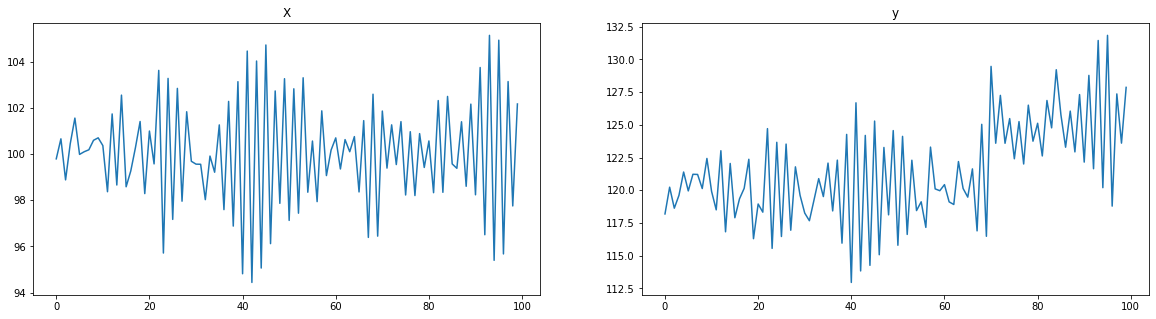

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax[0].plot(X)
ax[0].set_title('X')

ax[1].plot(y)
ax[1].set_title('y')

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    125.23             3756.86
Prediction (s.d.)         120.39 (0.27)      3611.81 (8.04)
95% CI                    [119.88, 120.93]   [3596.28, 3627.8]

Absolute effect (s.d.)    4.84 (0.27)        145.06 (8.04)
95% CI                    [4.3, 5.35]        [129.06, 160.58]

Relative effect (s.d.)    4.02% (0.22%)      4.02% (0.22%)
95% CI                    [3.57%, 4.45%]     [3.57%, 4.45%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 125.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.39.
The 95% interval of this counterfactual prediction is [119.88, 120.93].
Subtracting this prediction from t

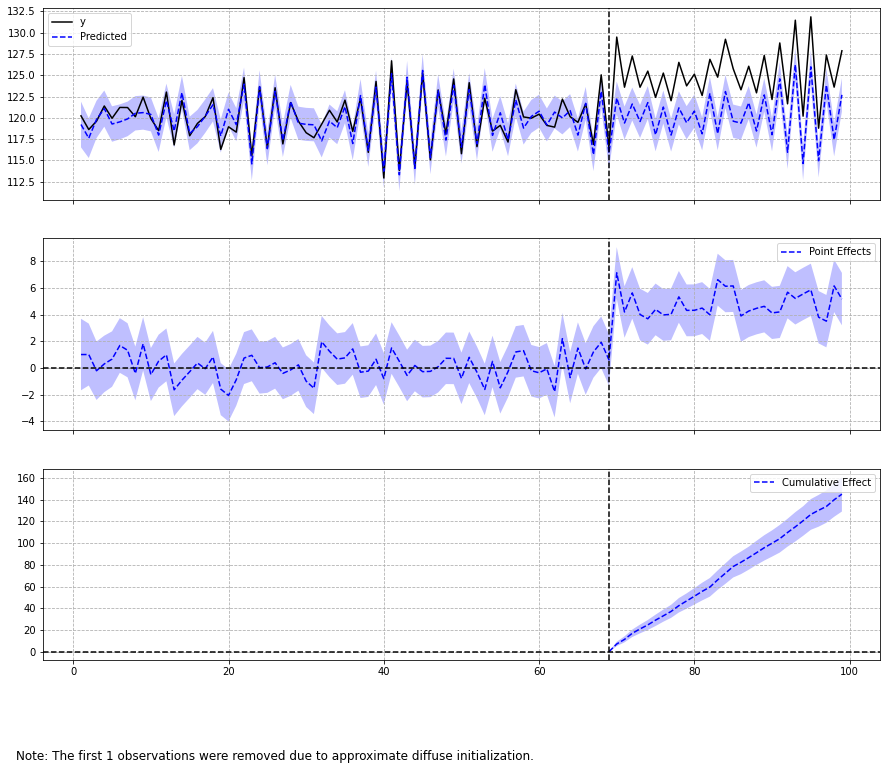

In [ ]:
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X'])
pre_period = [0, 69]
post_period = [70, 99]

ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

## multivariate random signal test

In [ ]:
# This is an example presented in Google's R code.
np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])
arma_process = ArmaProcess(ar, ma)

x0 = 100 + arma_process.generate_sample(nsample=100)
x1 = 90 + arma_process.generate_sample(nsample=100)
y = 1.2 * x0 + 0.9 * x1 + np.random.normal(size=100)
y[70:] += 5


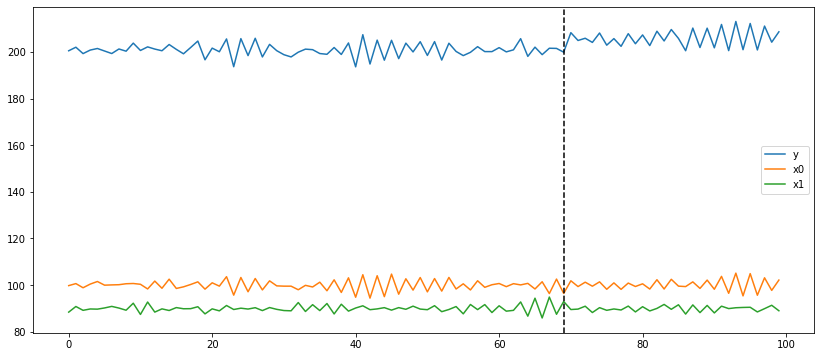

In [ ]:
data = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y}, columns=['y', 'x0', 'x1'])

data.plot()
plt.axvline(69, linestyle='--', color='k')
plt.legend()

### Restrictive prior on the level std

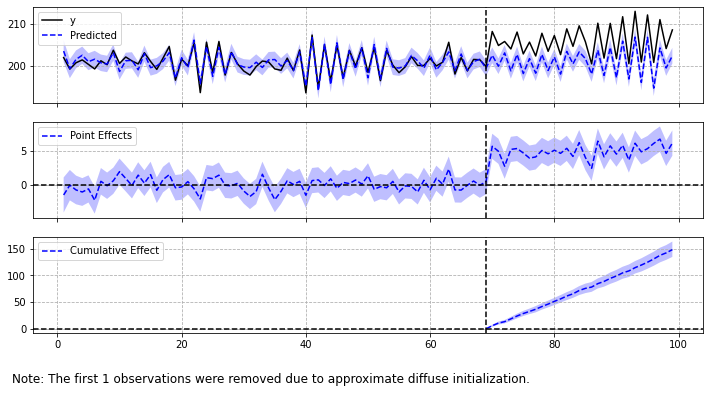

In [ ]:
pre_period = [0, 69]
post_period = [70, 99]

ci = CausalImpact(data, pre_period, post_period)
ci.plot(figsize=(12, 6))

When plotting results, three graphics are printed by default:

- the "origial" series versus its predicted one
- the "points effects" (which is the difference between original series and predicted)
- finally the "cumulative" effect which is basically the summation of the point effects accumulated over time.

### Prior uses maximum likelihood estimation

You may wonder why the difference and the main point is: in Python's package, the prior on the level std is quite restrictive; this is the same as saying that the prior knowledge has a strong weight when fitting the model.

Which also means that in this Python implementation, you should use the prior only if you are comfortable on how the data behaves, otherwise, you can leave the prior as None and the package will by itself to optimize this parameter using maximum likelihood estimation. Let's see what happens when we do so:

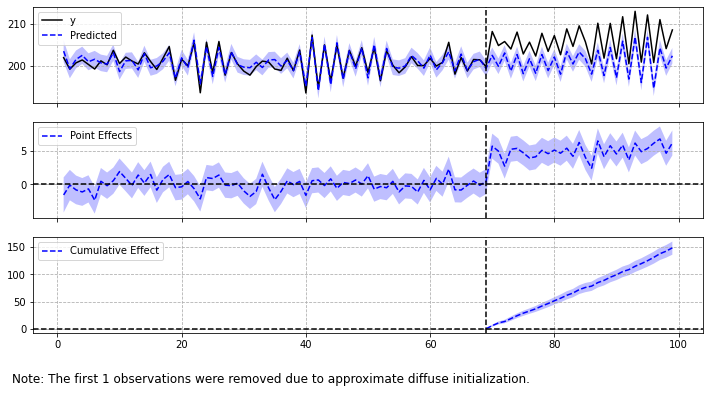

In [ ]:
ci = CausalImpact(data, pre_period, post_period, prior_level_sd=None)
ci.plot(figsize=(12, 6))

# test on swift


## getting modis data

In [ ]:
#variable declaration

filename = 'MODIS_TS_EVI_EBTRN_Sites.csv'

In [ ]:
df = pd.read_csv(filename)
df.head()

,alt,lat,lon,siteID,2000-02-18T00:00:00,2000-03-05T00:00:00,2000-03-21T00:00:00,2000-04-06T00:00:00,2000-04-22T00:00:00,2000-05-08T00:00:00,2000-05-24T00:00:00,2000-06-09T00:00:00,2000-06-25T00:00:00,2000-07-11T00:00:00,2000-07-27T00:00:00,2000-08-12T00:00:00,2000-08-28T00:00:00,2000-09-13T00:00:00,2000-09-29T00:00:00,2000-10-15T00:00:00,2000-10-31T00:00:00,2000-11-16T00:00:00,2000-12-02T00:00:00,2000-12-18T00:00:00,2001-01-01T00:00:00,2001-01-17T00:00:00,2001-02-02T00:00:00,2001-02-18T00:00:00,2001-03-06T00:00:00,2001-03-22T00:00:00,2001-04-07T00:00:00,2001-04-23T00:00:00,2001-05-09T00:00:00,2001-05-25T00:00:00,2001-06-10T00:00:00,2001-06-26T00:00:00,2001-07-12T00:00:00,2001-07-28T00:00:00,2001-08-13T00:00:00,2001-08-29T00:00:00,...,2017-09-30T00:00:00,2017-10-16T00:00:00,2017-11-01T00:00:00,2017-11-17T00:00:00,2017-12-03T00:00:00,2017-12-19T00:00:00,2018-01-01T00:00:00,2018-01-17T00:00:00,2018-02-02T00:00:00,2018-02-18T00:00:00,2018-03-06T00:00:00,2018-03-22T00:00:00,2018-04-07T00:00:00,2018-04-23T00:00:00,2018-05-09T00:00:00,2018-05-25T00:00:00,2018-06-10T00:00:00,2018-06-26T00:00:00,2018-07-12T00:00:00,2018-07-28T00:00:00,2018-08-13T00:00:00,2018-08-29T00:00:00,2018-09-14T00:00:00,2018-09-30T00:00:00,2018-10-16T00:00:00,2018-11-01T00:00:00,2018-11-17T00:00:00,2018-12-03T00:00:00,2018-12-19T00:00:00,2019-01-01T00:00:00,2019-01-17T00:00:00,2019-02-02T00:00:00,2019-02-18T00:00:00,2019-03-06T00:00:00,2019-03-22T00:00:00,2019-04-07T00:00:00,2019-04-23T00:00:00,2019-05-09T00:00:00,2019-05-25T00:00:00,2019-06-10T00:00:00
0,570,47.191442,6.277375,FS25,2930.0,2741.0,2759.0,2965.0,3103.0,5839.0,8273.0,7278.0,6472.0,7109.0,5608.0,5141.0,5480.0,4829.0,4302.0,3244.0,2849.0,2668.0,2916.0,2505.0,2428.0,2400.0,2597.0,2624.0,1977.0,2663.0,3755.0,3486.0,4420.0,7553.0,6986.0,7317.0,6979.0,6763.0,5853.0,5968.0,...,4447.0,2906.0,2729.0,2549.0,2362.0,3701.0,2479.0,3277.0,2481.0,2496.0,2007.0,2793.0,3528.0,5065.0,5597.0,6332.0,6434.0,5359.0,5528.0,5590.0,5162.0,4246.0,4468.0,4286.0,3574.0,2759.0,2534.0,2552.0,2384.0,2384.0,1916.0,2360.0,2552.0,3249.0,2703.0,3325.0,3906.0,5072.0,6466.0,5616.0
1,325,48.509078,6.704715,FS54a,2824.0,2610.0,2864.0,2901.0,4854.0,4945.0,6032.0,5644.0,6037.0,6471.0,5714.0,5354.0,5014.0,5239.0,5525.0,4208.0,3529.0,3874.0,3216.0,3031.0,2745.0,2968.0,3014.0,3578.0,2581.0,3048.0,2454.0,4361.0,7437.0,6248.0,6190.0,6901.0,6974.0,6395.0,6089.0,882.0,...,5153.0,4080.0,4406.0,3477.0,4297.0,1802.0,2938.0,1378.0,3634.0,2730.0,3179.0,2805.0,5426.0,7028.0,7397.0,6904.0,6496.0,5874.0,6664.0,6411.0,5946.0,5241.0,5990.0,5808.0,4918.0,2975.0,2942.0,2702.0,1412.0,2183.0,2775.0,2807.0,2604.0,2898.0,2757.0,3235.0,5100.0,8108.0,7072.0,5839.0
2,145,49.205399,3.126344,FS02,2808.0,2217.0,2236.0,2437.0,6410.0,6248.0,6332.0,6522.0,6885.0,6287.0,6112.0,5450.0,5564.0,4777.0,5583.0,4151.0,2836.0,2738.0,2650.0,2459.0,1535.0,2636.0,2137.0,2586.0,1986.0,2219.0,2427.0,5080.0,6234.0,6934.0,7426.0,7114.0,5895.0,5966.0,6435.0,6920.0,...,4371.0,4510.0,3478.0,2693.0,2589.0,3040.0,2371.0,2472.0,1370.0,2759.0,2694.0,2769.0,4852.0,6524.0,6399.0,6447.0,6941.0,6019.0,5711.0,6083.0,5590.0,5059.0,4918.0,4748.0,4717.0,3868.0,2989.0,2851.0,2237.0,1804.0,2229.0,2286.0,2315.0,3084.0,2547.0,4822.0,5898.0,6292.0,6741.0,6262.0
3,138,49.323585,2.875263,FS60,2293.0,2116.0,2574.0,2546.0,6080.0,6194.0,6218.0,6225.0,6461.0,5913.0,5401.0,5374.0,5598.0,5245.0,5601.0,4309.0,3094.0,2431.0,2044.0,2465.0,2898.0,2373.0,2156.0,2561.0,1954.0,3151.0,2490.0,2844.0,6065.0,6993.0,7318.0,7031.0,5840.0,6025.0,6503.0,6868.0,...,4237.0,4227.0,3994.0,2713.0,2811.0,3810.0,2820.0,2556.0,1731.0,2765.0,2637.0,2782.0,4041.0,6251.0,6983.0,7085.0,6743.0,6344.0,5793.0,6124.0,5642.0,5266.0,5158.0,4823.0,5081.0,3571.0,2506.0,2921.0,2542.0,1702.0,2888.0,2338.0,2391.0,3307.0,2616.0,3540.0,6419.0,6285.0,6275.0,7015.0
4,87,55.605000,13.799000,FL,-235.0,2664.0,2397.0,2462.0,4790.0,4802.0,6462.0,5340.0,5997.0,5443.0,5636.0,2054.0,4396.0,4251.0,4614.0,1652.0,3576.0,1978.0,777.0,1986.0,2253.0,496.0,2236.0,2375.

In [ ]:
def reformat_modis_df(modis_df):
  modis_loc_df = modis_df.iloc[:,3:]
  modis_loc_df.index = modis_loc_df.iloc[:,0]
  modis_loc_df = modis_loc_df.iloc[:,1:]
  modis_loc_T = modis_loc_df.T
  modis_loc_T.index = pd.to_datetime(modis_loc_T.index)
  # modis_loc_T.plot(figsize=(25,10))

  # resample for monthly means
  modis_loc_T = modis_loc_T.resample('M').mean()

  ##GLDAS data retried from GEE sets the monthly avg on the first day of the month
  modis_loc_T.index = modis_loc_T.index.map(lambda t: t.replace(day=1))


  return(modis_loc_T)

mean_modis = reformat_modis_df(df)

### Overall plot inspection

In [ ]:
mean_modis

siteID,FS25,FS54a,FS02,FS60,FL,FR,Bnik,Bgar,Bcas,Bgov,Bdra,Bmon,Btjn,GERM174,GERM215,GERM151,ITAL039,ITAL036,SWIT259,SWIT345,SWIT295,s097,s033,s103,s106,E17,E45,E10,E09,E46,E06,E07,E39,E38,E31,E30,E50,E20,E18,E13,...,LLSR,OGMS,SSAK,WMFH,LR38,FS55,OAH,HSBB,HSKM,ITAL037,ROM_PAU,Bbuk,KA,E19,SAMA,OGLC,NGEW,KHKF,KHLF,KHLW,GERM184,GERM182,SeL,Ses,VERM11,VERM10,UnS,UnL,GERM148,GERM152,GERM167,GERM164,GERM212,GERM211,WHSB,WHSG,UK32,BWS,VERM19,VERM17
2000-02-01,2930.0,2824.0,2808.0,2293.0,-235.0,670.0,1729.0,3169.0,560.0,1466.0,1059.0,1888.0,1698.0,2749.0,-203.0,760.0,3512.0,3124.0,561.0,1748.0,2344.0,1987.0,2073.0,2232.0,2410.0,1267.0,3541.0,2558.0,2677.0,664.0,2393.0,2326.0,2757.0,2671.0,1997.0,2151.0,2583.0,2669.0,2851.0,2286.0,...,2264.0,1337.0,2562.0,2502.0,1635.0,2453.0,1825.0,1343.0,1731.0,2788.0,2494.0,2034.0,2166.0,3342.0,132.0,1844.0,1496.0,2375.0,2375.0,2375.0,2674.0,2674.0,-174.0,-174.0,1394.0,1394.0,230.0,230.0,1693.0,1693.0,786.0,786.0,2312.0,2312.0,2323.0,2323.0,2790.0,2790.0,94.0,94.0
2000-03-01,2750.0,2737.0,2226.5,2345.0,2530.5,2727.5,1935.0,2676.5,2501.0,1449.5,2294.0,1615.0,1699.5,2273.0,2369.5,1072.0,3892.5,3260.5,1486.0,1923.0,2480.0,1815.0,2511.5,2906.0,2249.5,2758.0,3683.0,2519.5,2797.0,2547.5,2497.0,2281.0,2266.0,2558.5,1694.5,2257.5,2931.0,1935.5,2845.5,2434.5,...,2593.5,658.0,1971.0,1845.0,1917.0,2412.0,3606.5,3009.5,1762.5,4432.5,1343.0,2498.0,2419.0,3034.0,1589.0,2435.0,1417.5,2638.0,2638.0,2638.0,2630.0,2630.0,2220.5,2220.5,1893.0,1893.0,2141.5,2141.5,2041.0,2041.0,1707.5,1707.5,2200.0,2200.0,2351.0,2351.0,4632.0,4632.0,606.0,606.0
2000-04-01,3034.0,3877.5,4423.5,4313.0,3626.0,3147.0,5193.0,6690.0,2938.0,5563.0,4505.0,2380.5,1783.5,1807.5,4156.0,2095.0,4729.5,4677.5,2207.0,3040.0,3733.5,4699.5,4904.5,3825.0,4098.0,3519.5,5163.0,2781.5,3744.5,2916.5,3941.5,3422.0,4387.0,4440.5,4294.0,2451.0,2650.5,3039.0,2642.5,3907.0,...,4110.5,1366.5,2797.5,2915.5,3854.5,4421.5,4520.5,2106.0,3950.5,5339.5,2569.0,6152.5,2515.0,3960.5,2940.5,2713.5,1931.0,3108.5,3108.5,3108.5,4045.0,4045.0,2821.5,2821.5,4599.0,4599.0,3609.0,3609.0,3357.5,3357.5,3911.5,3911.5,3002.5,3002.5,2802.5,2802.5,4008.5,4008.5,1998.5,1998.5
2000-05-01,7056.0,5488.5,6290.0,6206.0,5632.0,4475.5,7045.5,7676.5,6149.5,7363.5,7164.5,3784.5,4060.0,5611.5,4880.0,1814.0,5651.5,5094.5,6145.0,5774.5,6485.0,6059.5,7365.0,6359.5,5953.5,6791.0,6627.5,5591.5,6034.0,5815.5,6659.0,6712.5,6892.0,6621.0,7221.0,7299.0,3511.5,3511.5,3770.5,7097.5,...,5371.0,3069.0,5073.0,4892.0,7559.0,5969.5,5084.0,6023.5,6100.5,4930.0,5684.0,7637.5,6579.0,4405.5,5104.0,5095.0,3440.0,3410.0,3410.0,3410.0,5302.0,5302.0,3030.0,3030.0,7215.0,7215.0,4830.5,4830.5,5624.5,5624.5,6664.0,6664.0,4458.0,4458.0,4168.5,4168.5,5408.5,5408.5,3026.0,3026.0
2000-06-01,6875.0,5840.5,6703.5,6343.0,5668.5,5226.0,6523.5,7610.0,6100.0,7093.5,6391.5,5763.0,6268.5,5840.0,3756.0,1254.0,4926.5,6275.0,6256.0,6564.0,6440.0,7143.0,7657.0,6656.5,5683.0,5995.5,5212.0,5443.0,5345.0,6171.0,6751.5,6573.0,5459.5,6231.5,7050.5,7233.0,3457.0,5081.5,5452.0,6216.5,...,4880.0,3489.0,5106.0,5522.0,6960.0,6701.0,6548.5,5085.0,4246.5,5610.5,6502.5,6844.5,5872.5,5835.5,5105.0,5078.5,4229.5,3931.5,3931.5,3931.5,6395.0,6395.0,3001.5,3001.5,7564.5,7564.5,5130.0,5130.0,3612.0,3612.0,5288.0,5288.0,4299.5,4299.5,4477.5,4477.5,3231.5,3231.5,3894.0,3894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-01,2456.0,2705.5,2300.5,2364.5,3162.0,2726.0,1910.0,2764.5,1117.5,1650.0,1198.5,2189.5,1146.0,2470.5,2110.5,-720.5,3278.0,1368.5,992.0,1853.5,1916.5,2240.0,2113.5,2755.0,2534.0,1298.5,3334.0,2548.0,2487.0,753.5,1872.0,2472.0,2564.0,2057.5,2158.5,2527.5,2955.5,2765.5,3664.0,2199.5,...,2381.5,1249.0,2898.0,2467.5,1697.5,2239.5,2676.5,1545.0,1990.5,1892.0,1305.

In [ ]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ['trend', 'seasonal', 'resid']
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == 'resid':
            ax.plot(series, marker='o', linestyle='none')
        else:
            ax.plot(series)
            if comp == 'trend':
                ax.legend(legend, frameon=False)

def STL_rob_decomp_df(df, input_id, legend):
  df_trans = df[input_id]
  stl = STL(df_trans, period=math.ceil(12), seasonal=21, robust=False)
  res = stl.fit()
  fig = res.plot()

  stl_rob = STL(df_trans, period=math.ceil(12), seasonal=21, robust=True)
  res_rob = stl_rob.fit()

  add_stl_plot(fig, res_rob, legend)

  fig.set_size_inches(20,10)

### trend inspecting

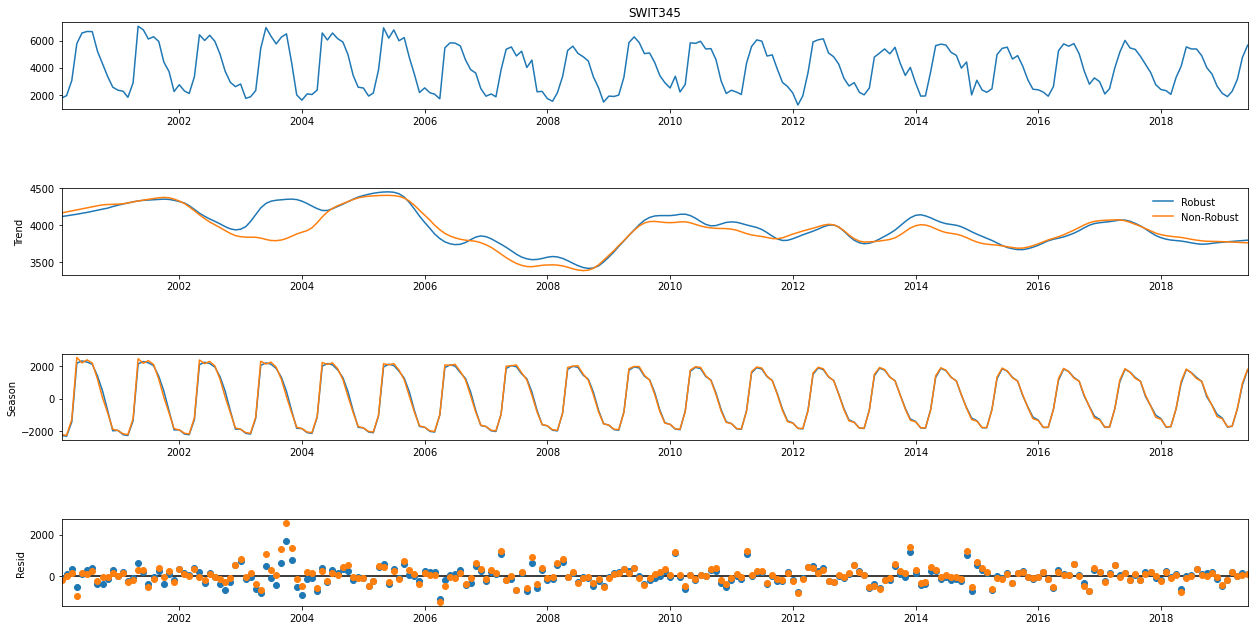

In [ ]:
configure_plotly_browser_state()
STL_rob_decomp_df(mean_modis, 'SWIT345',['Robust','Non-Robust'])

### interactive trend inspection

In [ ]:
def STL_rob_decomp_interactive_df(df, input_id, legend):
  '''
    description: interactive version of the plot
  '''
  df_trans = df[input_id]
  stl = STL(df_trans, period=math.ceil(12), seasonal=21)
  res = stl.fit()
  fig = res.plot()
  fig.set_size_inches(20,10)
  #fig.suptitle(input_id)
  plotly_fig = tls.mpl_to_plotly(fig)
  plotly_fig.update_layout(title=input_id)
  plotly_fig.show()

  fig.set_size_inches(20,10)

In [ ]:
configure_plotly_browser_state()
STL_rob_decomp_interactive_df(mean_modis, 'SWIT345',['Robust','Non-Robust'])

/usr/local/lib/python3.6/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



## functions for reading covariate data

,SWIT345
2000-02-18,1748.0
2000-03-05,1733.0
2000-03-21,2113.0
2000-04-06,2331.0
2000-04-22,3749.0


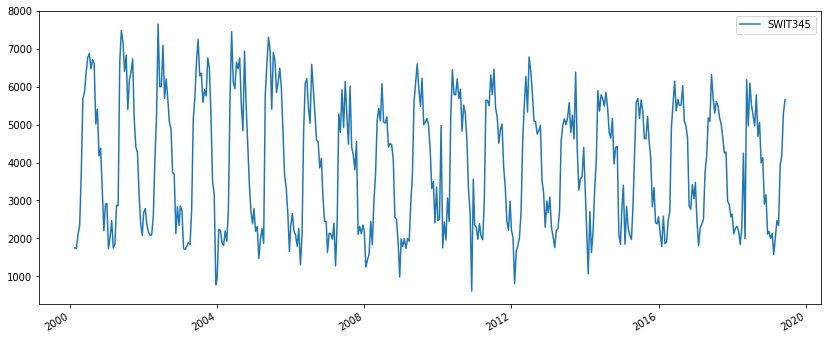

In [ ]:
def index_data(df, index):
  ind_data = []
  return ind_data

def site_data(df, input_id):
  site_data = df[df['siteID'] == input_id].iloc[:,4:]
  return site_data 

def plot_site_data(df, input_id,kind=''):
  df_trans = site_data(df, input_id).T
  df_trans.columns = [input_id]
  df_trans.index = pd.to_datetime(df_trans.index)
  return(df_trans.plot(style='.'))

def trans_col(df, input_id):
  df_trans = site_data(df, input_id).T
  df_trans.columns = [input_id]
  df_trans.index = pd.to_datetime(df_trans.index)
  return(df_trans)

def convert_df_cols(input_df):
  input_list = input_df.index
  input_df.index = pd.to_datetime([convert_str_date(date_str) for date_str in input_list])
  return(input_df)

def convert_str_date(input_str):
  input_list = input_str.split('_')
  year = input_list[-1]
  month = input_list[2]

  out_date = dt.datetime(int(year), int(month),1)
  
  return(out_date)

input_id = 'SWIT345'
df_trans = trans_col(df, input_id)
X = df_trans.values #2d
loc_data = df_trans.iloc[:,0].values #1d

display(df_trans.head())
df_trans.plot()

In [ ]:
def get_file_df(file_cov, siteID):
  gee_file_path = 'GEE_Folder/' + siteID + '/'

  # file naming convention
  # file_cov = 'wind_monthly_'

  # file_name = 'SWIT345'

  file_path = gee_file_path + file_cov + siteID + '.csv'

  raw_df = pd.read_csv(file_path)
  raw_df = raw_df.iloc[:,1:-1].T

  df = convert_df_cols(raw_df)
  df = df.sort_index()
  df = df.rename(columns={0: file_cov})
  return(df)

swit345_Stemp = get_file_df('surf_skin_', 'SWIT345')
swit345_Stemp

,surf_skin_
2000-01-01,295.943909
2000-02-01,297.727692
2000-03-01,299.323547
2000-04-01,302.276367
2000-05-01,302.006836
...,...
2010-08-01,302.158112
2010-09-01,303.676422
2010-10-01,301.095917
2010-11-01,298.426666


## creating covariate dataframe

In [ ]:
gldas_cov_list = ['precipitation_rate_monthly_',
                  'spec_humid_monthly_',
                  'air_temp_monthly_',
                  'wind_monthly_',
                  'surf_skin_']
gldas_df = {}

for cov in gldas_cov_list:
  if len(gldas_df) == 0:
    gldas_df = get_file_df(cov, 'SWIT345')
  else:
    gldas_df[cov] = get_file_df(cov, 'SWIT345')

gldas_df

,precipitation_rate_monthly_,spec_humid_monthly_,air_temp_monthly_,wind_monthly_,surf_skin_
2000-01-01,1.947581e-07,0.009375,293.541077,3.886919,295.943909
2000-02-01,5.163793e-07,0.009099,295.492859,3.754614,297.727692
2000-03-01,1.325000e-06,0.008648,296.347656,3.799320,299.323547
2000-04-01,1.386375e-05,0.011951,298.918732,3.066098,302.276367
2000-05-01,1.701734e-05,0.011753,299.115417,3.912390,302.006836
...,...,...,...,...,...
2010-08-01,3.904032e-06,0.010757,299.250397,5.845569,302.158112
2010-09-01,3.807083e-06,0.011556,299.612366,3.643694,303.676422
2010-10-01,7.206048e-06,0.009221,296.949799,2.266092,301.095917
2010-11-01,1.525417e-06,0.008278,295.089722,3.188132,298.426666


# Casual Impact using raw EVI data

### combining to get dataframe with modis' EVI

In [ ]:
mean_modis['SWIT345']

2000-02-01    1748.0
2000-03-01    1923.0
2000-04-01    3040.0
2000-05-01    5774.5
2000-06-01    6564.0
               ...  
2019-02-01    1853.5
2019-03-01    2248.0
2019-04-01    3131.0
2019-05-01    4746.5
2019-06-01    5655.0
Name: SWIT345, Length: 233, dtype: float64

In [ ]:
gldas_df['modis'] = mean_modis['SWIT345']
gldas_df

,precipitation_rate_monthly_,spec_humid_monthly_,air_temp_monthly_,wind_monthly_,surf_skin_,modis
2000-01-01,1.947581e-07,0.009375,293.541077,3.886919,295.943909,NaN
2000-02-01,5.163793e-07,0.009099,295.492859,3.754614,297.727692,1748.0
2000-03-01,1.325000e-06,0.008648,296.347656,3.799320,299.323547,1923.0
2000-04-01,1.386375e-05,0.011951,298.918732,3.066098,302.276367,3040.0
2000-05-01,1.701734e-05,0.011753,299.115417,3.912390,302.006836,5774.5
...,...,...,...,...,...,...
2010-08-01,3.904032e-06,0.010757,299.250397,5.845569,302.158112,5379.0
2010-09-01,3.807083e-06,0.011556,299.612366,3.643694,303.676422,5405.5
2010-10-01,7.206048e-06,0.009221,296.949799,2.266092,301.095917,4594.0
2010-11-01,1.525417e-06,0.008278,295.089722,3.188132,298.426666,2996.0


In [ ]:
def format_cols_casualimpact(df, y_col_name):
  '''
  description: formating column names to fit casual impact function

                example of format:
                data = pd.DataFrame({'x0': x0, 'x1': x1, 'y': y}, 
                                     columns=['y', 'x0', 'x1'])

  returns: dataframe with correct columns names as seen in example

  '''
  old_list = df.columns.to_list()
  new_cols = {}
  
  for idx, col in enumerate(old_list):
    print(col)
    if col != y_col_name:
      new_cols['x'+str(idx)] = col
    else:
      new_cols['y'] = y_col_name

  df.columns = new_cols

  return(df)

data = format_cols_casualimpact(gldas_df, 'modis')

precipitation_rate_monthly_
spec_humid_monthly_
air_temp_monthly_
wind_monthly_
surf_skin_
modis


In [ ]:
data = data.dropna()
data

,x0,x1,x2,x3,x4,y
2000-02-01,5.163793e-07,0.009099,295.492859,3.754614,297.727692,1748.0
2000-03-01,1.325000e-06,0.008648,296.347656,3.799320,299.323547,1923.0
2000-04-01,1.386375e-05,0.011951,298.918732,3.066098,302.276367,3040.0
2000-05-01,1.701734e-05,0.011753,299.115417,3.912390,302.006836,5774.5
2000-06-01,6.769167e-06,0.009748,300.591400,6.413600,302.956299,6564.0
...,...,...,...,...,...,...
2010-08-01,3.904032e-06,0.010757,299.250397,5.845569,302.158112,5379.0
2010-09-01,3.807083e-06,0.011556,299.612366,3.643694,303.676422,5405.5
2010-10-01,7.206048e-06,0.009221,296.949799,2.266092,301.095917,4594.0
2010-11-01,1.525417e-06,0.008278,295.089722,3.188132,298.426666,2996.0


### casual impact on real data

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



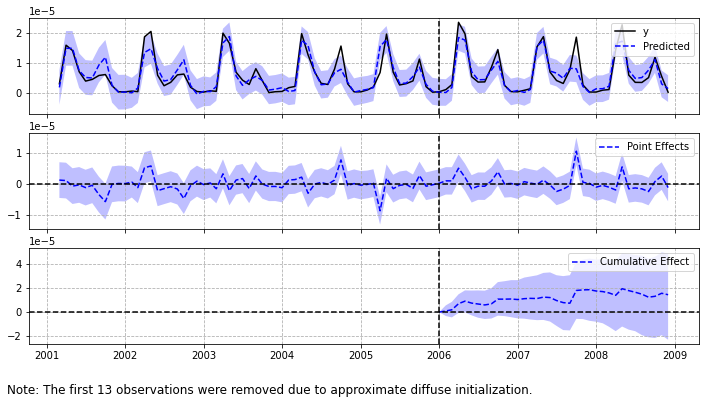

In [ ]:
pre_period = ['2000-02-01', '2006-01-01']
post_period = ['2006-02-01', '2008-12-01']
#post_period = ['2008-09-01', '2010-12-01']

ci = CausalImpact(data, pre_period, post_period, nseasons=[{'period':12}])
ci.plot(figsize=(12, 6))

In [ ]:
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    0.0                0.0
Prediction (s.d.)         0.0 (0.0)          0.0 (0.0)
95% CI                    [0.0, 0.0]         [0.0, 0.0]

Absolute effect (s.d.)    0.0 (0.0)          0.0 (0.0)
95% CI                    [-0.0, 0.0]        [-0.0, 0.0]

Relative effect (s.d.)    6.46% (8.18%)      6.46% (8.18%)
95% CI                    [-10.27%, 21.79%]  [-10.27%, 21.79%]

Posterior tail-area probability p: 0.19
Posterior prob. of a causal effect: 80.62%

For more details run the command: print(impact.summary('report'))


# Casual Impact using trend of EVI

In [ ]:
gldas_df

,x0,x1,x2,x3,x4,y
2000-01-01,1.947581e-07,0.009375,293.541077,3.886919,295.943909,NaN
2000-02-01,5.163793e-07,0.009099,295.492859,3.754614,297.727692,1748.0
2000-03-01,1.325000e-06,0.008648,296.347656,3.799320,299.323547,1923.0
2000-04-01,1.386375e-05,0.011951,298.918732,3.066098,302.276367,3040.0
2000-05-01,1.701734e-05,0.011753,299.115417,3.912390,302.006836,5774.5
...,...,...,...,...,...,...
2010-08-01,3.904032e-06,0.010757,299.250397,5.845569,302.158112,5379.0
2010-09-01,3.807083e-06,0.011556,299.612366,3.643694,303.676422,5405.5
2010-10-01,7.206048e-06,0.009221,296.949799,2.266092,301.095917,4594.0
2010-11-01,1.525417e-06,0.008278,295.089722,3.188132,298.426666,2996.0


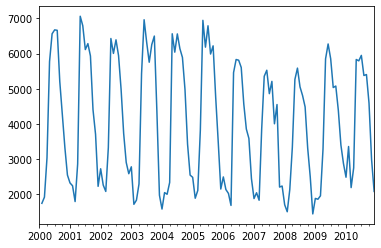

In [ ]:
gldas_df['modis'].plot()

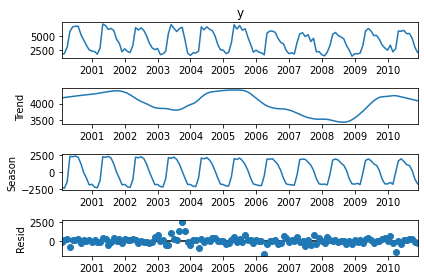

In [ ]:
stl = STL(data['y'], period=12, seasonal=11, robust=True)
res = stl.fit()
fig = res.plot()

In [ ]:
evi_trend = res.trend
evi_trend

2000-02-01    4168.597192
2000-03-01    4179.408993
2000-04-01    4190.021503
2000-05-01    4200.576204
2000-06-01    4211.003609
                 ...     
2010-08-01    4160.197752
2010-09-01    4140.857147
2010-10-01    4121.901739
2010-11-01    4102.927564
2010-12-01    4083.347036
Name: trend, Length: 131, dtype: float64

In [ ]:
trend_data = data.copy()
trend_data['y'] = evi_trend
trend_data

,x0,x1,x2,x3,x4,y
2000-02-01,5.163793e-07,0.009099,295.492859,3.754614,297.727692,4168.597192
2000-03-01,1.325000e-06,0.008648,296.347656,3.799320,299.323547,4179.408993
2000-04-01,1.386375e-05,0.011951,298.918732,3.066098,302.276367,4190.021503
2000-05-01,1.701734e-05,0.011753,299.115417,3.912390,302.006836,4200.576204
2000-06-01,6.769167e-06,0.009748,300.591400,6.413600,302.956299,4211.003609
...,...,...,...,...,...,...
2010-08-01,3.904032e-06,0.010757,299.250397,5.845569,302.158112,4160.197752
2010-09-01,3.807083e-06,0.011556,299.612366,3.643694,303.676422,4140.857147
2010-10-01,7.206048e-06,0.009221,296.949799,2.266092,301.095917,4121.901739
2010-11-01,1.525417e-06,0.008278,295.089722,3.188132,298.426666,4102.927564


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



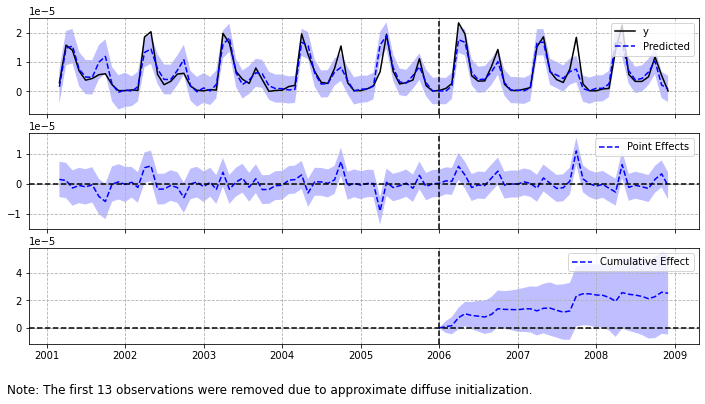

In [ ]:
pre_period = ['2000-02-01', '2006-01-01']
post_period = ['2006-02-01', '2008-12-01']
#post_period = ['2008-09-01', '2010-12-01']

ci = CausalImpact(trend_data, pre_period, post_period, nseasons=[{'period':12}], prior_level_sd=None)
ci.plot(figsize=(12, 6))